### Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Try and Build Regression model using all the techniques of regression: Linear, Ridge, Lasso, Decision Tree and XGboost

In [1]:
# importing required data and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the train data
df = pd.read_csv(r"C:\Users\User\Downloads\trainbigmart.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [2]:
# check for the null values and explore shape as well
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [3]:
df.shape

(8523, 12)

There are only two variables with missing values – Item_Weight and Outlet_Size.

Since Item_Weight is a continuous variable, we can use either mean or median to impute the missing values. On the other hand, Outlet_Size is a categorical variable and hence we will replace the missing values by the mode of the column. You can try different methods to impute missing values as well.



<Axes: xlabel='Item_Weight'>

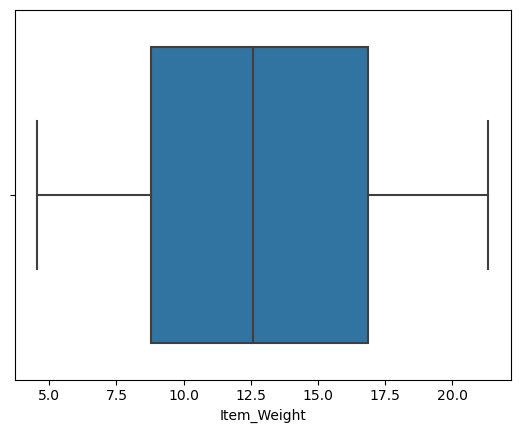

In [4]:
#create box plot on Item weight
sns.boxplot(x=df['Item_Weight'])

In [5]:
# impute missing values in item weight by mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

# impute outlet size in training data by mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [6]:
# check for the null values again
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Explore the categorical columns

Encode the categorical variables

To check the categorical variables in the data, you can use the train_data.dtypes() function. This will give you a list of the data types against each variable. For the BigMart sales data, we have the following categorical variable –

Item_Fat_Content

Item_Type,

Outlet_Identifier

Outlet_Size,

Outlet_Location_Type, and

Outlet_Type

In [7]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Item_Fat_Content',
                    'Item_Type',
                    'Outlet_Identifier',
                    'Outlet_Size',
                    'Outlet_Location_Type',
                    'Outlet_Type']
le = LabelEncoder()
# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [8]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Explore categorical columns after label encoding


### Scale the data:

So far we have taken care of the missing values and the categorical (string) variables in the data. Next we will work with the continuous variables. Often the continuous variables in the data have different scales, for instance, a variable V1 can have a range from 0 to 1 while another variable can have a range from 0-1000.

Based on the type of model you are building, you will have to normalize the data in such a way that the range of all the variables is almost similar

In [9]:
#apply standard scaler on Item MRP column onlu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
o = df[['Item_MRP']]
o_scaled= scaler.fit_transform(o)
pd.DataFrame(o_scaled)

,0
0,1.747454
1,-1.489023
2,0.010040
3,0.660050
4,-1.399220
...,...
8518,1.180783
8519,-0.527301
8520,-0.897208
8521,-0.607977


### Model Building

Now that we are done with the basic pre-processing steps, we can go ahead and build simple machine learning models over this data. We will try two models here – Linear Regression to predict the sales.

To compare the performance of the models, we will create a validation set (or test set). Here I have randomly split the data into two parts using the train_test_split() function, such that the validation set holds 25% of the data points while the train set has 75%

In [10]:
# importing libraries for model building
from sklearn.model_selection import train_test_split


# separate the independent and target variable
x = df.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y = df['Item_Outlet_Sales']

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
xs = scaler.fit_transform(x)
# randomly split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# shape of train and test splits
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 10)
(2131, 10)
(6392,)
(2131,)


In [11]:
xs

array([[-0.84187169, -0.57284357, -0.97073217, ..., -0.28458121,
        -1.36933384, -0.25265831],
       [-1.64170589,  0.97809218, -0.90811123, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 1.09855449, -0.57284357, -0.95691733, ..., -0.28458121,
        -1.36933384, -0.25265831],
       ...,
       [-0.53424315, -0.57284357, -0.59978449, ...,  1.38127431,
        -0.13888236, -0.25265831],
       [-1.33644372,  0.97809218,  1.53287976, ..., -0.28458121,
         1.09156913,  1.00297245],
       [ 0.45963367, -0.57284357, -0.41193591, ...,  1.38127431,
        -1.36933384, -0.25265831]])

GO ahead and perfom model building using Multiple methods. Feel Free to perform any additional preprocessing

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
model.intercept_

1570.7043334275572

In [14]:
model.coef_

array([ 1.08262652e+00,  3.01462015e+01, -1.51579916e+03, -9.04998122e-01,
        1.57189418e+01,  6.00208434e+01, -1.15573666e+00, -3.19116527e+02,
       -1.99940917e+02,  8.83098900e+02])

In [15]:
pd.DataFrame(model.coef_,index=x.columns)

,0
Item_Weight,1.082627
Item_Fat_Content,30.146202
Item_Visibility,-1515.799155
Item_Type,-0.904998
Item_MRP,15.718942
Outlet_Identifier,60.020843
Outlet_Establishment_Year,-1.155737
Outlet_Size,-319.116527
Outlet_Location_Type,-199.940917
Outlet_Type,883.098900


In [16]:
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.508092069305689

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate residuals = actual - predicted
#square the residuals
#sum the squared values/n: MSE

mse = mean_squared_error(y_test, y_pred)#actual y value, predicted y value
rmse = sqrt(mse)
rmse

1193.5377775393213

In [18]:
y_predtrain = model.predict(x_train)
model.score(x_train, y_train)

0.5106994251946155

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate residuals = actual - predicted
#square the residuals
#sum the squared values: MSE

mse = mean_squared_error(y_train, y_predtrain)#acutal y value, predicted y value
rmse = sqrt(mse)
rmse

1194.669454019709

In [20]:
print("Training set score: {:.2f}".format(model.score(x_train, y_train)))
print("Test set score: {:.2f}".format(model.score(x_test, y_test)))

Training set score: 0.51
Test set score: 0.51


#RidgeRegression

In [21]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

#instantiate repeated k fold
rcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

#instantiate ridgecv
model = RidgeCV(alphas=arange(0.1,1,0.01),cv=rcv, scoring='neg_mean_absolute_error')

model.fit(x_train,y_train)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [22]:
model.alpha_

0.20999999999999996

In [23]:
model.score(x_test,y_test)

0.5081089728668207

In [24]:
y_pred = model.predict(x_test)
#margin of error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmse

1193.5172704374334

In [25]:
#checking for overfitting

#r square
model.score(x_train,y_train)

0.5106990945813519

In [26]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
rmse = mse ** 0.5
rmse

1194.669857630006

In [27]:
model.coef_

array([ 1.08449118e+00,  3.01008298e+01, -1.49612774e+03, -8.96192972e-01,
        1.57190508e+01,  6.00992995e+01, -1.14588893e+00, -3.19276540e+02,
       -1.99789818e+02,  8.83159339e+02])

In [28]:
pd.DataFrame(model.coef_,index=x.columns)

,0
Item_Weight,1.084491
Item_Fat_Content,30.100830
Item_Visibility,-1496.127739
Item_Type,-0.896193
Item_MRP,15.719051
Outlet_Identifier,60.099300
Outlet_Establishment_Year,-1.145889
Outlet_Size,-319.276540
Outlet_Location_Type,-199.789818
Outlet_Type,883.159339


# Lasso Regression

In [29]:
from sklearn.linear_model import LassoCV

#instantiate repeated k fold
rcv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

model = LassoCV(alphas=arange(0,1,0.01),\
                cv=rcv)#default scoring is r squared

model.fit(x_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4104276412.5285406, tolerance: 1673769.1201277128
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Obje

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1))

In [30]:
model.alpha_

0.04

In [31]:
model.score(x_test,y_test)

0.5081023426758005

In [32]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
rmse

1193.5253141101036

In [33]:
model.score(x_train,y_train)

0.5106991977161939

In [34]:
y_pred_train = model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
rmse = mse ** 0.5
rmse

1194.6697317237463

In [35]:
pd.DataFrame(model.coef_,index=x.columns)

,0
Item_Weight,1.082059
Item_Fat_Content,30.016559
Item_Visibility,-1500.039765
Item_Type,-0.896976
Item_MRP,15.719004
Outlet_Identifier,60.142941
Outlet_Establishment_Year,-1.151179
Outlet_Size,-319.012231
Outlet_Location_Type,-199.418509
Outlet_Type,882.937943


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor


In [37]:
df['Outlet_Identifier'].value_counts()

5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [38]:
dt = DecisionTreeRegressor(random_state=1)

dt = dt.fit(x_train, y_train)

In [39]:
y_pred = dt.predict(x_test)
y_pred
#r square
dt.score(x_test,y_test)




0.160952198563447

In [40]:
y_pred = dt.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
rmse

1558.789994090366

In [41]:
#check for overfitting
dt.score(x_train,y_train)

1.0

In [42]:
y_pred_train = dt.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
rmse = mse ** 0.5
rmse

0.0

In [43]:
#decision tree with hyperparameter tuning
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50],
    'min_samples_split': [2,5,10,20]
}

In [44]:
dt = DecisionTreeRegressor()#instantiate the classifier

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv = 4,
                           scoring="neg_mean_absolute_error")

In [45]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_absolute_error')

In [46]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=50)

In [47]:
params = {
    'max_depth': range(3,6),
    'min_samples_leaf': range(3,11),
    'min_samples_split': range(3,11)
}

In [48]:
dt = DecisionTreeRegressor()#instantiate the classifier

from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv = 4,
                           scoring="neg_mean_absolute_error")

In [49]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(3, 6),
                         'min_samples_leaf': range(3, 11),
                         'min_samples_split': range(3, 11)},
             scoring='neg_mean_absolute_error')

In [50]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=3)

In [51]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=9, min_samples_split=7)

dt = dt.fit(x_train, y_train)

In [52]:
y_pred = dt.predict(x_test)
#r square
dt.score(x_test,y_test)

0.5920746491341786

In [53]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
rmse

1086.8875282974293

In [54]:
y_pred_train = dt.predict(x_train)
dt.score(x_train,y_train)

0.6051370846722168

In [55]:
mse = mean_squared_error(y_train,y_pred_train)
rmse = mse ** 0.5
rmse

1073.2059465587477

# XGBoost

In [56]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [57]:
len(y_train)

6392

In [58]:
sum(y_train)/len(y_train)

2188.3703348873582

In [59]:
sum(y_test)/len(y_test)

2160.0479726888766

In [60]:
modelxgb = xgb.XGBRegressor(objective='reg:squarederror',
                            eval_metric="logloss", ## this avoids a warning...
                            
                            )
modelxgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [61]:
y_pred = modelxgb.predict(x_test)

In [62]:
y_pred = modelxgb.predict(x_test)
#r square
modelxgb.score(x_test,y_test)

0.5157070791524592

In [63]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
rmse

1184.2634283977768

In [64]:
y_pred_train = modelxgb.predict(x_train)
modelxgb.score(x_train,y_train)

0.8709839315870149

In [65]:
mse = mean_squared_error(y_train,y_pred_train)
rmse = mse ** 0.5
rmse

613.4537112616309

In [66]:
import warnings
warnings.filterwarnings('ignore')
#xgboost with hyperparameter tuning
#Round 1
param_grid = {'max_depth': [3, 4, 5],'learning_rate': [0.1, 0.01, 0.05],
              'gamma': [0, 0.25, 1.0],'reg_lambda': [0, 1.0, 10.0],
              'scale_pos_weight': [1, 3, 5]}
#n_estimators; default is 100 (no. of boosting rounds), subsample, colsample_bytree

optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          ),param_grid=param_grid,
                              scoring='neg_mean_absolute_error', verbose=0,cv = 3)

optimal_params.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(x_test, y_test)],verbose=False)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5], 'reg_lambda': [0, 1.0, 10.0],
                         'scale_pos_weight': [1, 3, 5]},
             scoring='neg_mean_absolute_error')

In [67]:
optimal_params.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 10.0,
 'scale_pos_weight': 1}

In [69]:
#round 2
param_grid = {
    'max_depth': [4,5,6],
    'learning_rate': [0.1, 0.2, 0.3],
    'gamma': [0],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [1]
 }
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          ),param_grid=param_grid,
                              scoring='neg_mean_absolute_error', verbose=0,cv = 3)

optimal_params.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(x_test, y_test)],verbose=False)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6], 'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [1]},
             scoring='neg_mean_absolute_error')

In [70]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 20,
 'scale_pos_weight': 1}

In [71]:
#round 3
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.08,0.09,0.1,0.11],
    'gamma': [0],
    'reg_lambda': [20,30,40],
    'scale_pos_weight': [1]
 }
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          ),param_grid=param_grid,
                              scoring='neg_mean_absolute_error', verbose=0,cv = 3)

optimal_params.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(x_test, y_test)],verbose=False)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0], 'learning_rate': [0.08, 0.09, 0.1, 0.11],
                         'max_depth': [4], 'reg_lambda': [20, 30, 40],
                         'scale_pos_weight': [1]},
             scoring='neg_mean_absolute_error')

In [72]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.08,
 'max_depth': 4,
 'reg_lambda': 20,
 'scale_pos_weight': 1}

In [73]:
#round 4
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.06,0.07,0.08],
    'gamma': [0],
    'reg_lambda': [19,20,21],
    'scale_pos_weight': [1]
 }
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          ),param_grid=param_grid,
                              scoring='neg_mean_absolute_error', verbose=0,cv = 3)

optimal_params.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(x_test, y_test)],verbose=False)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0], 'learning_rate': [0.06, 0.07, 0.08],
                         'max_depth': [4], 'reg_lambda': [19, 20, 21],
                         'scale_pos_weight': [1]},
             scoring='neg_mean_absolute_error')

In [74]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.07,
 'max_depth': 4,
 'reg_lambda': 19,
 'scale_pos_weight': 1}

In [75]:
#round 5
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.07],
    'gamma': [0],
    'reg_lambda': [17,18,19,20],
    'scale_pos_weight': [1]
 }
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          ),param_grid=param_grid,
                              scoring='neg_mean_absolute_error', verbose=0,cv = 3)

optimal_params.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(x_test, y_test)],verbose=False)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0], 'learning_rate': [0.07],
                         'max_depth': [4], 'reg_lambda': [17, 18, 19, 20],
                         'scale_pos_weight': [1]},
             scoring='neg_mean_absolute_error')

In [76]:
optimal_params.best_params_

{'gamma': 0,
 'learning_rate': 0.07,
 'max_depth': 4,
 'reg_lambda': 18,
 'scale_pos_weight': 1}

In [77]:
#round 6
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.07],
    'gamma': [0.01,0,0.02,0],
    'reg_lambda': [17,18,19,20],
    'scale_pos_weight': [0.09,0.08,1]
 }
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror',seed=42,
                                                          subsample=0.9,colsample_bytree=0.5,
                                                          ),param_grid=param_grid,
                              scoring='neg_mean_absolute_error', verbose=0,cv = 3)

optimal_params.fit(x_train,y_train,early_stopping_rounds=10,eval_metric='rmse',eval_set=[(x_test, y_test)],verbose=False)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0.01, 0, 0.02, 0], 'learning_rate': [0.07],
                         'max_depth': [4], 'reg_lambda': [17, 18, 19, 20],
                         'scale_pos_weight': [0.09, 0.08, 1]},
             scoring='neg_mean_absolute_error')

In [78]:
optimal_params.best_params_

{'gamma': 0.01,
 'learning_rate': 0.07,
 'max_depth': 4,
 'reg_lambda': 18,
 'scale_pos_weight': 0.09}

In [79]:
modelxgb = xgb.XGBRegressor(seed=42,
                        objective='reg:squarederror',
                        gamma=0.01,
                        learning_rate=0.07,
                        max_depth=4,
                        reg_lambda=18,
                        scale_pos_weight=0.09,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        )
modelxgb.fit(x_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='rmse',
            eval_set=[(x_test, y_test)])

[0]	validation_0-rmse:2593.81846
[1]	validation_0-rmse:2451.54995
[2]	validation_0-rmse:2327.25128
[3]	validation_0-rmse:2222.73771
[4]	validation_0-rmse:2122.06491
[5]	validation_0-rmse:2037.44220
[6]	validation_0-rmse:1940.94615
[7]	validation_0-rmse:1852.39503
[8]	validation_0-rmse:1776.48956
[9]	validation_0-rmse:1716.52319
[10]	validation_0-rmse:1662.14479
[11]	validation_0-rmse:1607.18904
[12]	validation_0-rmse:1561.87681
[13]	validation_0-rmse:1522.08877
[14]	validation_0-rmse:1486.99027
[15]	validation_0-rmse:1455.68432
[16]	validation_0-rmse:1428.08042
[17]	validation_0-rmse:1388.08928
[18]	validation_0-rmse:1367.27603
[19]	validation_0-rmse:1337.49888
[20]	validation_0-rmse:1306.67552
[21]	validation_0-rmse:1290.61792
[22]	validation_0-rmse:1265.12798
[23]	validation_0-rmse:1252.76973
[24]	validation_0-rmse:1233.71525
[25]	validation_0-rmse:1216.60345
[26]	validation_0-rmse:1201.24076
[27]	validation_0-rmse:1187.76713
[28]	validation_0-rmse:1180.23404
[29]	validation_0-rmse:1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
y_pred = modelxgb.predict(x_test)
#r square
modelxgb.score(x_test,y_test)

0.6017989939862181

In [81]:
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5
rmse

1073.8544816095587

In [82]:
y_pred_train = modelxgb.predict(x_train)
modelxgb.score(x_train,y_train)

0.6254667112923025

In [83]:
mse = mean_squared_error(y_train,y_pred_train)
rmse = mse ** 0.5
rmse

1045.2137362392525